___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum() 

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [12]:
df.shape

(10000, 12)

In [13]:
df["Exited"]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

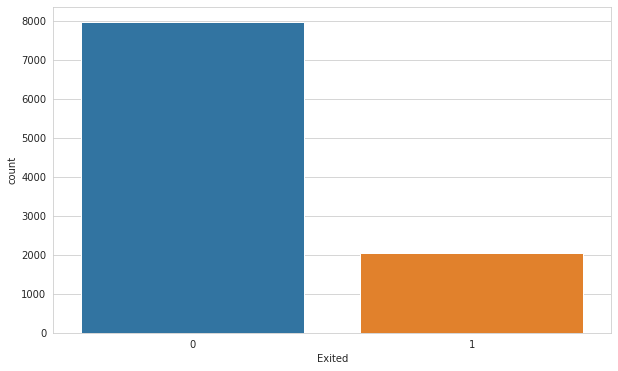

In [14]:
sns.countplot(df["Exited"])

In [15]:
df.Exited.value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

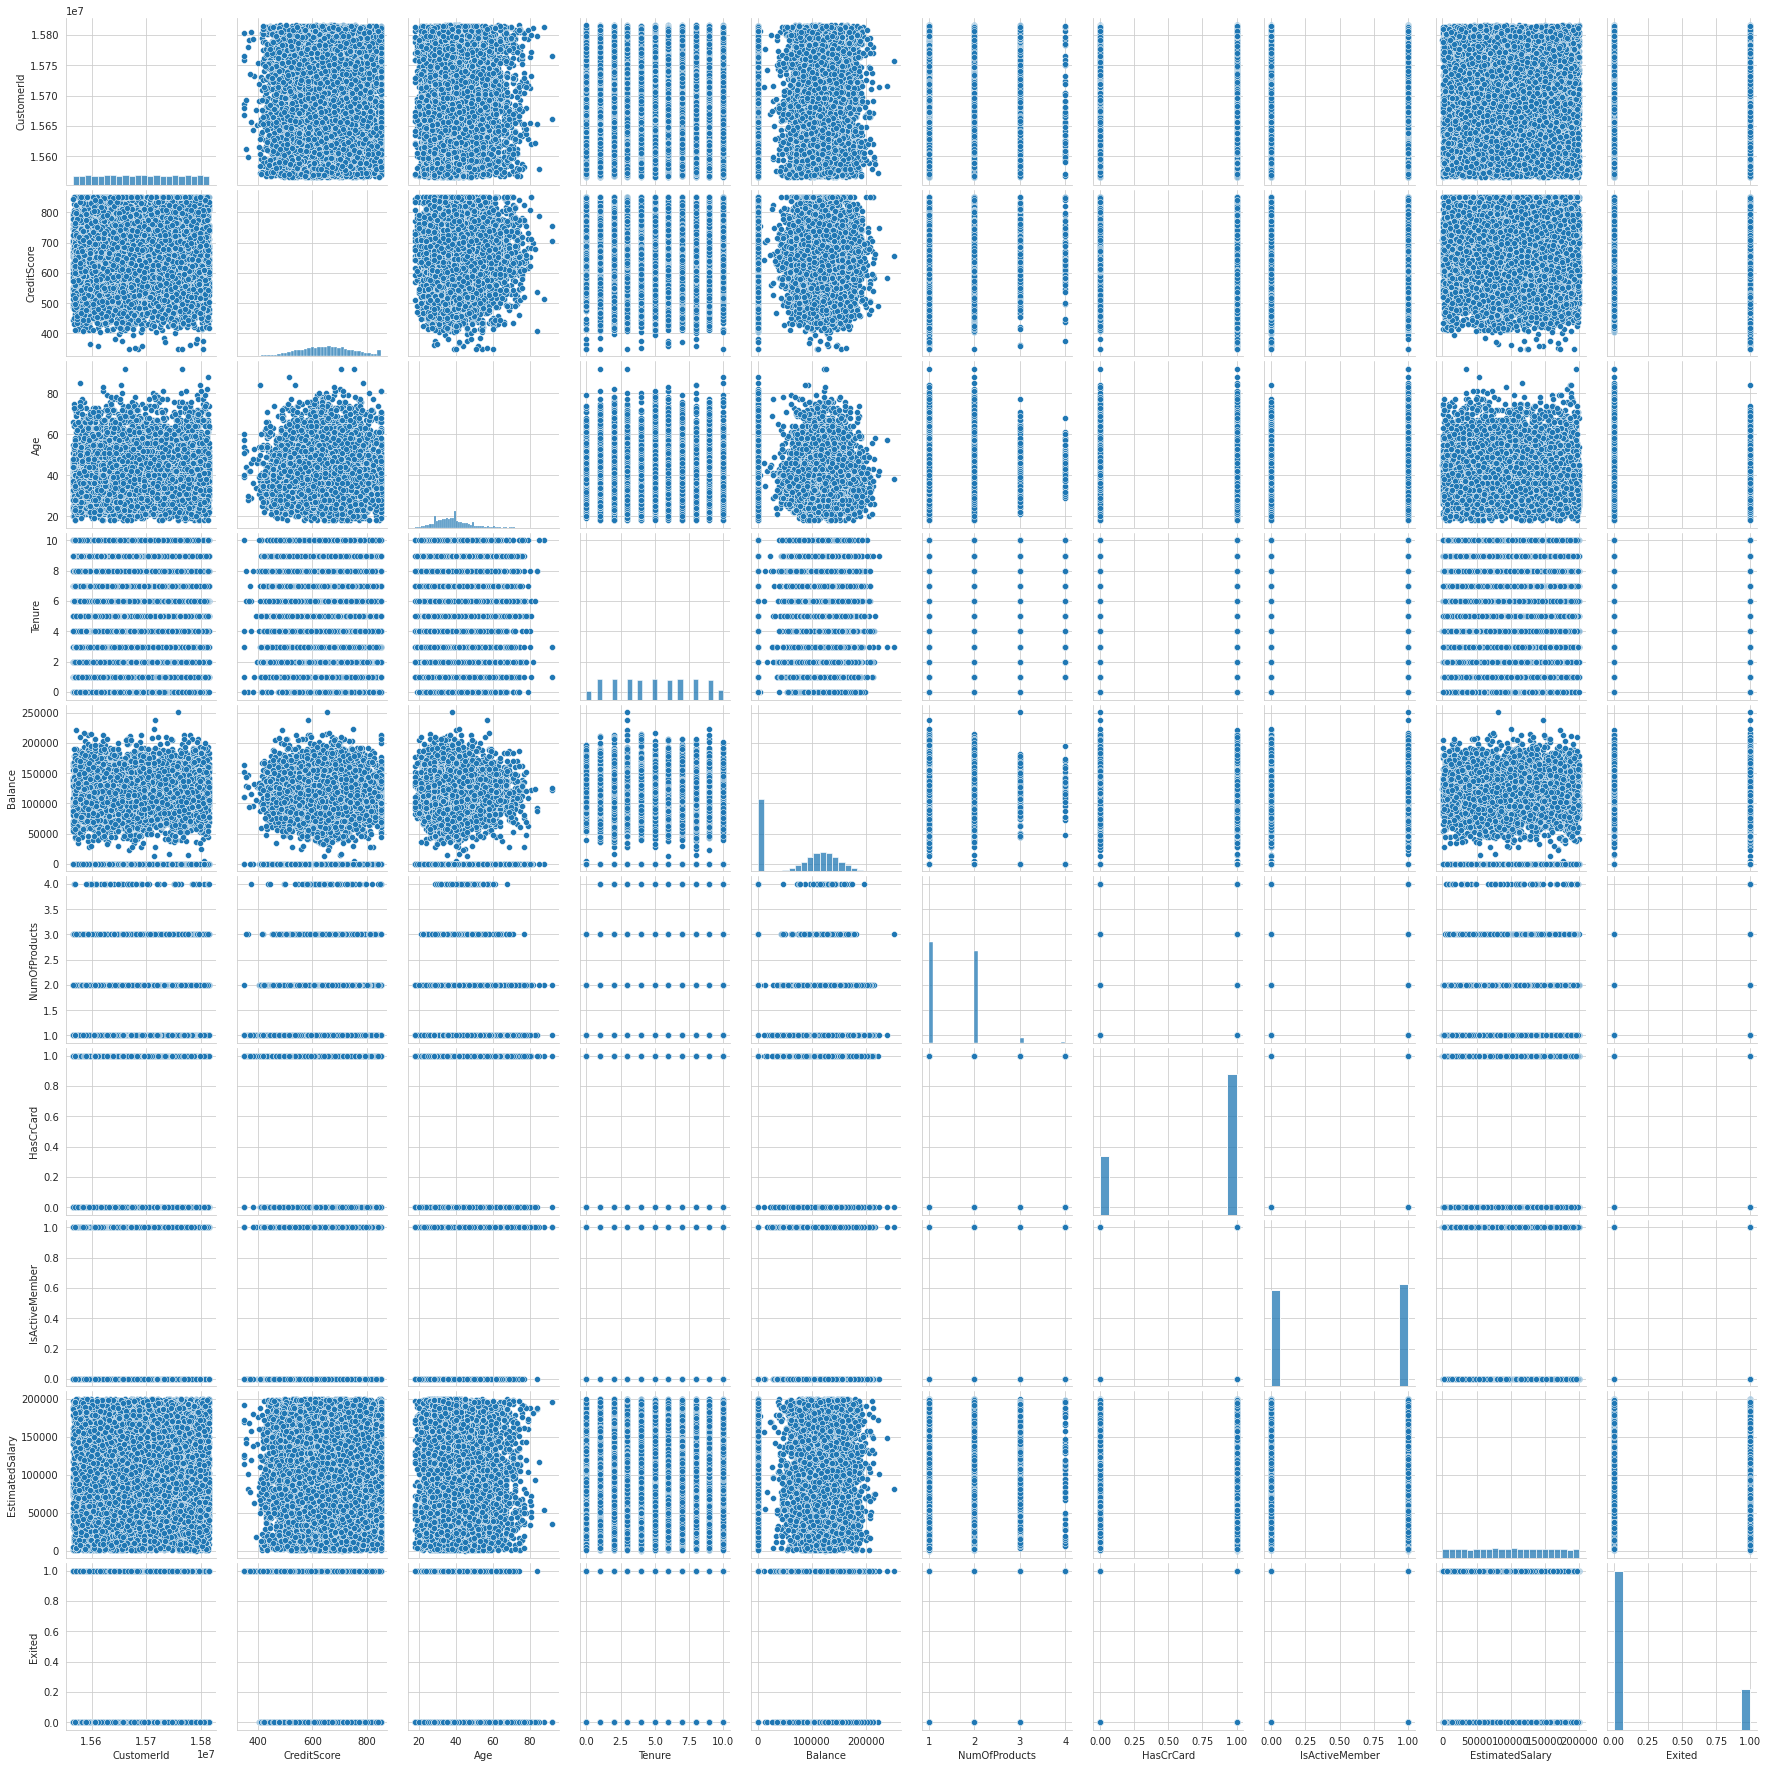

In [16]:
sns.pairplot(df);

In [17]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.006,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


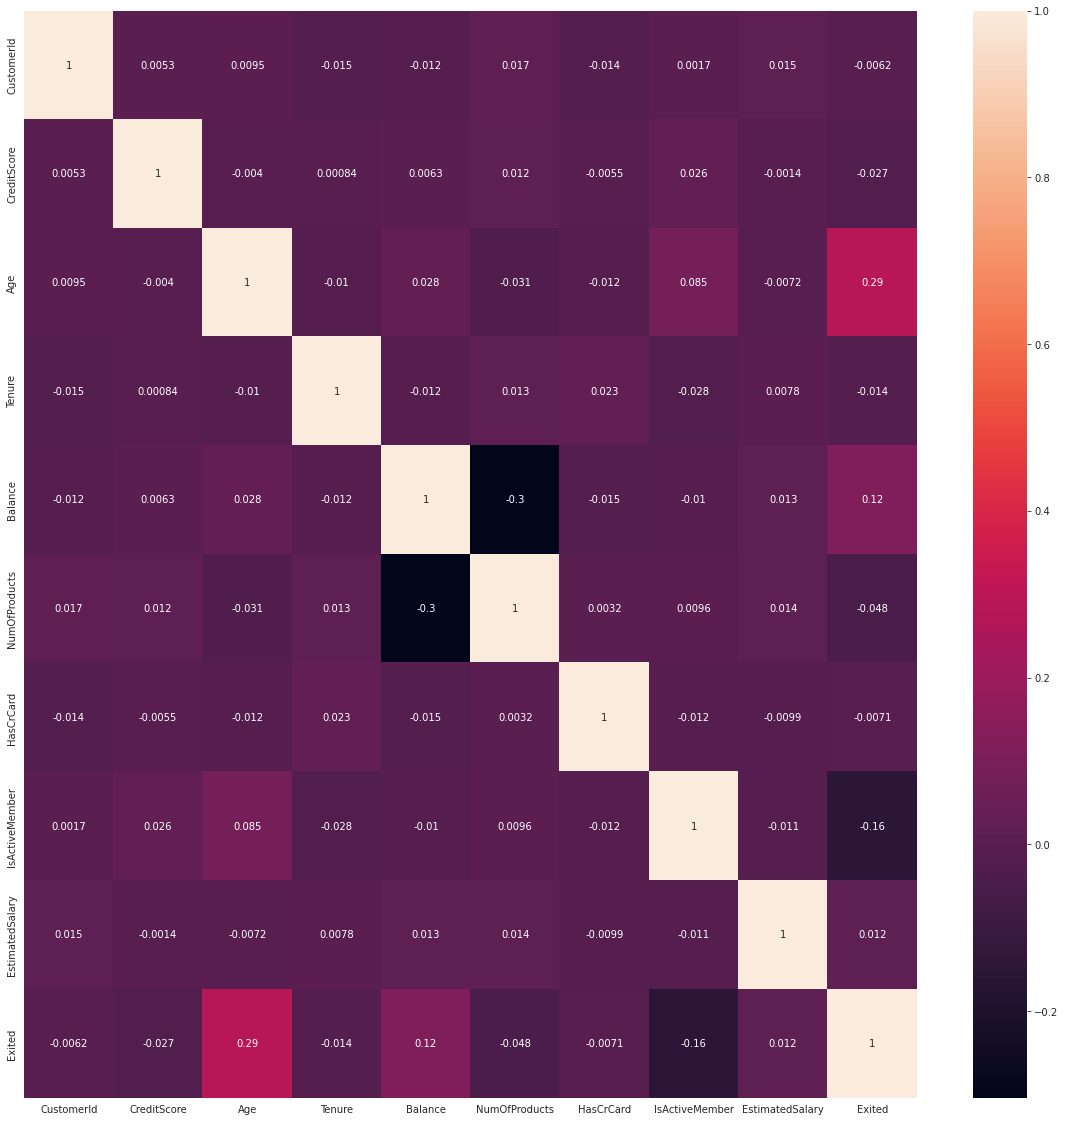

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

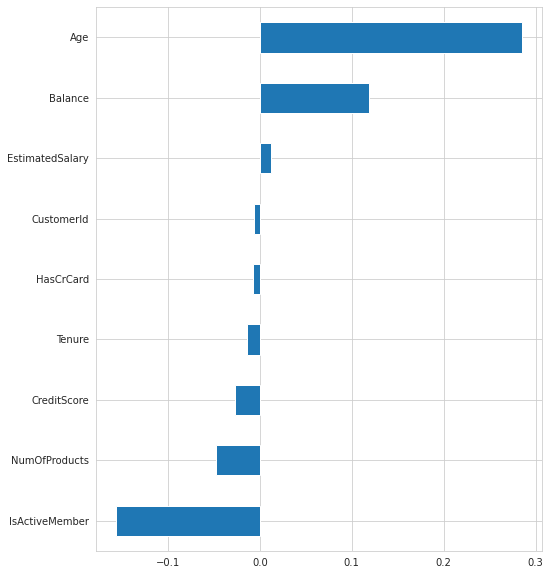

In [19]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

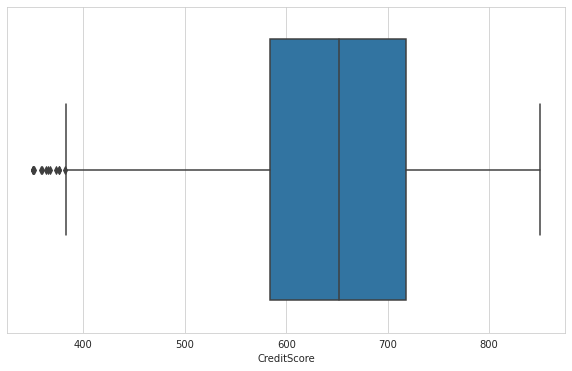

In [20]:
sns.boxplot(df['CreditScore'])

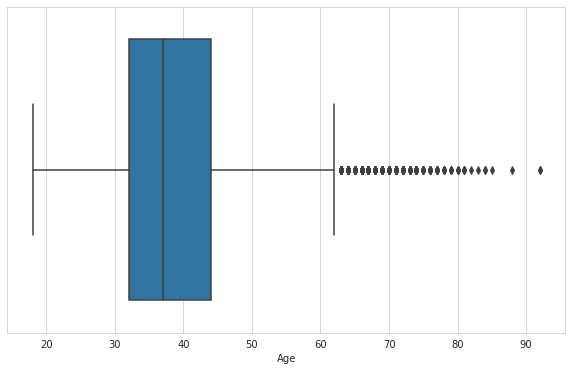

In [21]:
sns.boxplot(df['Age'])

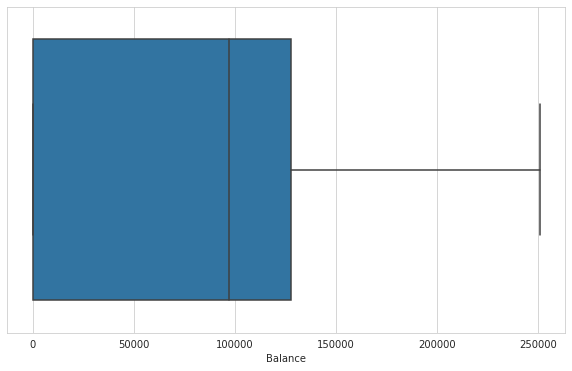

In [22]:
sns.boxplot(df['Balance'])


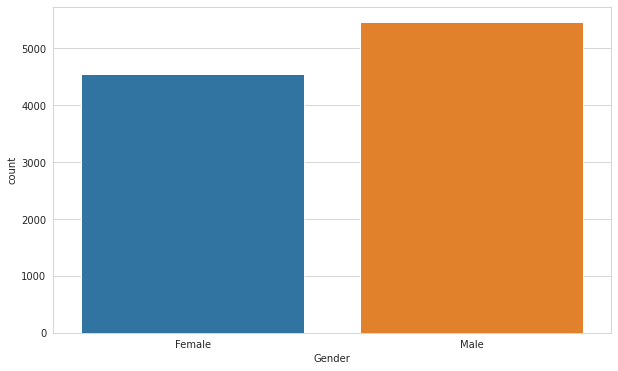

In [23]:
sns.countplot(df["Gender"])

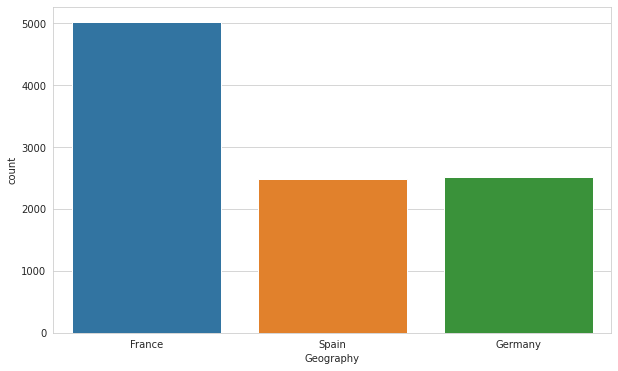

In [24]:
sns.countplot(df["Geography"])


In [25]:
df = pd.get_dummies(df, drop_first=True)

# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [28]:
seed = 42

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=seed)

In [30]:
scaler=MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
X_train.shape

(9000, 12)

In [35]:
X_test.shape

(1000, 12)

### Create The Model

## without class_weigth

In [39]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)


Epoch 1/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5091 - accuracy: 0.7922 - val_loss: 0.4927 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7960 - val_loss: 0.4960 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7960 - val_loss: 0.4724 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7960 - val_loss: 0.4685 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4837 - accuracy: 0.7956 - val_loss: 0.4656 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7967 - val_loss: 0.4629 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7949 - val_loss: 0.4628 - val_accuracy:

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

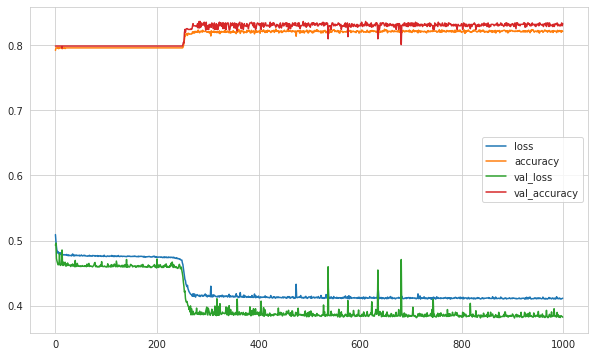

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.4009852409362793, 0.8299999833106995]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4009852409362793
accuracy :  0.8299999833106995


In [46]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[770  26]
 [144  60]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       796
           1       0.70      0.29      0.41       204

    accuracy                           0.83      1000
   macro avg       0.77      0.63      0.66      1000
weighted avg       0.81      0.83      0.80      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train) 
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [50]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model2.add(Dense(8, activation = "relu"))
model2.add(Dense(4, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [51]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                208       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [52]:
model2.fit(x=X_train, y=y_train, validation_split=.1, batch_size=32, epochs=1000, verbose=0, class_weight=class_weights)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [54]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,accuracy,recall,auc,precision_at_recall,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall
0,1.276,0.592,0.332,0.497,0.204,0.673,0.799,0.000,0.500,0.201
1,0.694,0.796,0.000,0.500,0.204,0.679,0.799,0.000,0.500,0.201
2,0.694,0.796,0.000,0.496,0.204,0.683,0.799,0.000,0.500,0.201
3,0.694,0.796,0.000,0.496,0.204,0.686,0.799,0.000,0.500,0.201
4,0.694,0.796,0.000,0.500,0.204,0.690,0.799,0.000,0.500,0.201


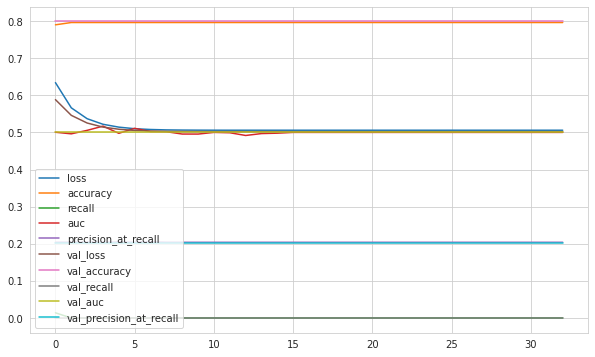

In [72]:
loss_df.plot();

In [73]:
loss_df = pd.DataFrame(model2.history.history)

In [56]:
model2.evaluate(X_test, y_test, verbose=0)

[0.6932746171951294, 0.20399999618530273, 1.0, 0.5, 0.20399999618530273]

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [59]:
from tensorflow.keras.optimizers import Adam

In [60]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [67]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)


In [68]:
model2.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.6341 - accuracy: 0.7899 - recall: 0.0139 - auc: 0.5004 - precision_at_recall: 0.2040 - val_loss: 0.5883 - val_accuracy: 0.7989 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_precision_at_recall: 0.2011
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.5662 - accuracy: 0.7960 - recall: 0.0000e+00 - auc: 0.4962 - precision_at_recall: 0.2041 - val_loss: 0.5460 - val_accuracy: 0.7989 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_precision_at_recall: 0.2011
Epoch 3/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.5369 - accuracy: 0.7960 - recall: 0.0000e+00 - auc: 0.5055 - precision_at_recall: 0.2040 - val_loss: 0.5253 - val_accuracy: 0.7989 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_precision_at_recall: 0.2011
Epoch 4/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.5219 - accuracy: 0.7960 - recall: 0.0000e+00 - auc: 0.5169 - precisi

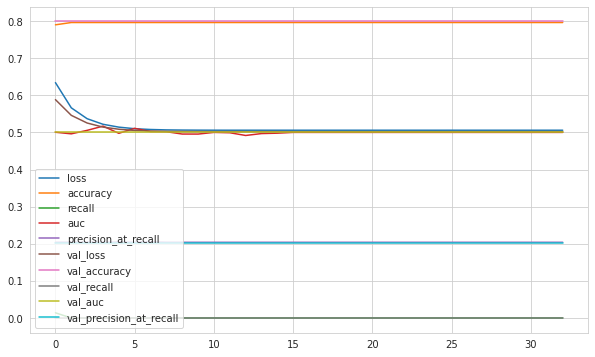

In [69]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot();

In [76]:
model2.evaluate(X_test, y_test, verbose=0)


[0.5058985948562622, 0.7960000038146973, 0.0, 0.5, 0.20399999618530273]

### Add Early Stop

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5091 - accuracy: 0.7922 - val_loss: 0.4927 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7960 - val_loss: 0.4960 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7960 - val_loss: 0.4724 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7960 - val_loss: 0.4685 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4837 - accuracy: 0.7956 - val_loss: 0.4656 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7967 - val_loss: 0.4629 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7949 - val_loss: 0.4628 - val_accuracy:

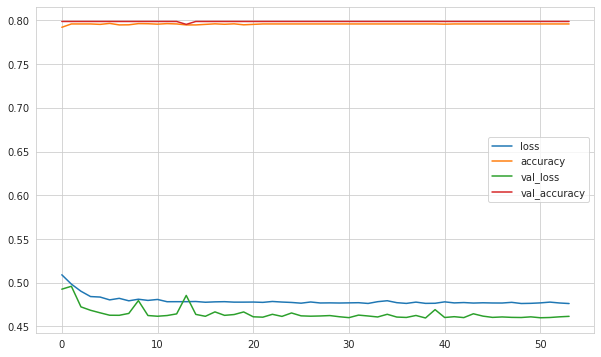

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.47563931345939636
accuracy :  0.7960000038146973


In [82]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



### Add Dropout Layer

In [83]:
from tensorflow.keras.layers import Dropout

In [84]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [85]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 4ms/step - loss: 1.1369 - accuracy: 0.6657 - val_loss: 0.5749 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5959 - accuracy: 0.7660 - val_loss: 0.5519 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5541 - accuracy: 0.7899 - val_loss: 0.5413 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5385 - accuracy: 0.7931 - val_loss: 0.5260 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.7951 - val_loss: 0.5203 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5188 - accuracy: 0.7956 - val_loss: 0.5107 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.7958 - val_loss: 0.5090 - val_accuracy:

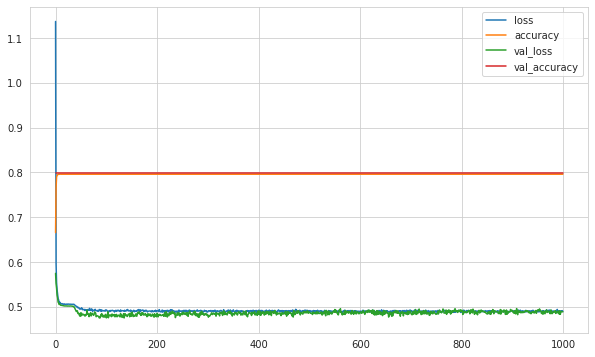

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [87]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.49570637941360474
accuracy :  0.7960000038146973


In [88]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

In [89]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [90]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [91]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [94]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

KeyboardInterrupt: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC (Receiver Operating Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 1ms/step


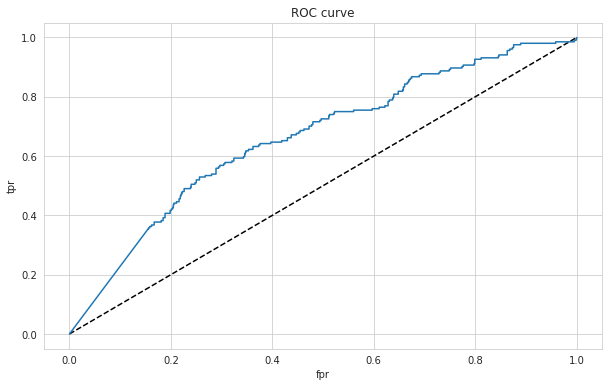

In [95]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [96]:
roc_auc_score(y_test, y_pred_proba)

0.6630394620159622

for gridsearchcv model

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [97]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [98]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)  

Epoch 1/200
36/36 [==============================] - 1s 10ms/step - loss: 0.8086 - recall: 0.4926 - val_loss: 0.6616 - val_recall: 0.3039
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6864 - recall: 0.5297 - val_loss: 0.6686 - val_recall: 0.4069
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6784 - recall: 0.5134 - val_loss: 0.7693 - val_recall: 0.9510
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6737 - recall: 0.5783 - val_loss: 0.6722 - val_recall: 0.5245
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6655 - recall: 0.5767 - val_loss: 0.6403 - val_recall: 0.5245
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6602 - recall: 0.5837 - val_loss: 0.7069 - val_recall: 0.7353
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6549 - recall: 0.5712 - val_loss: 0.6927 - val_recall: 0.7353
Epoch 8/200
36/36 [=====================

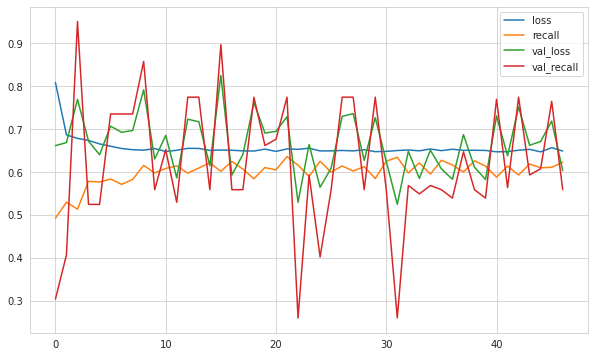

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [100]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5247160792350769
recall :  0.2598039209842682


In [101]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[714  82]
 [151  53]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       796
           1       0.39      0.26      0.31       204

    accuracy                           0.77      1000
   macro avg       0.61      0.58      0.59      1000
weighted avg       0.74      0.77      0.75      1000



In [111]:
model.save('model_churn.h5')


## Prediction

In [130]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CustomerId          15634602.000
CreditScore              619.000
Age                       42.000
Tenure                     2.000
Balance                    0.000
NumOfProducts              1.000
HasCrCard                  1.000
IsActiveMember             1.000
EstimatedSalary       101348.880
Geography_Germany          0.000
Geography_Spain            0.000
Gender_Male                0.000
Name: 0, dtype: float64

In [133]:
single_customer = scaler.transform (single_customer.values.reshape(-1, 12))
single_customer 

array([[0.27561613, 0.538     , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 0.        ,
        0.        , 0.        ]])

In [134]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 15ms/step


array([[0]], dtype=int32)

In [135]:
df["Exited"].iloc[0]


1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___